In [1]:
import pandas as pd
import numpy as np
 
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest
from scipy.stats.mstats import winsorize

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../dataset/이자보상배율최종.csv', encoding='CP949')
df

,회사명,거래소코드,회계년도,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [3]:
df_n = df[['[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)']]

## Winsorize를 사용하기 위해 Histogram 확인

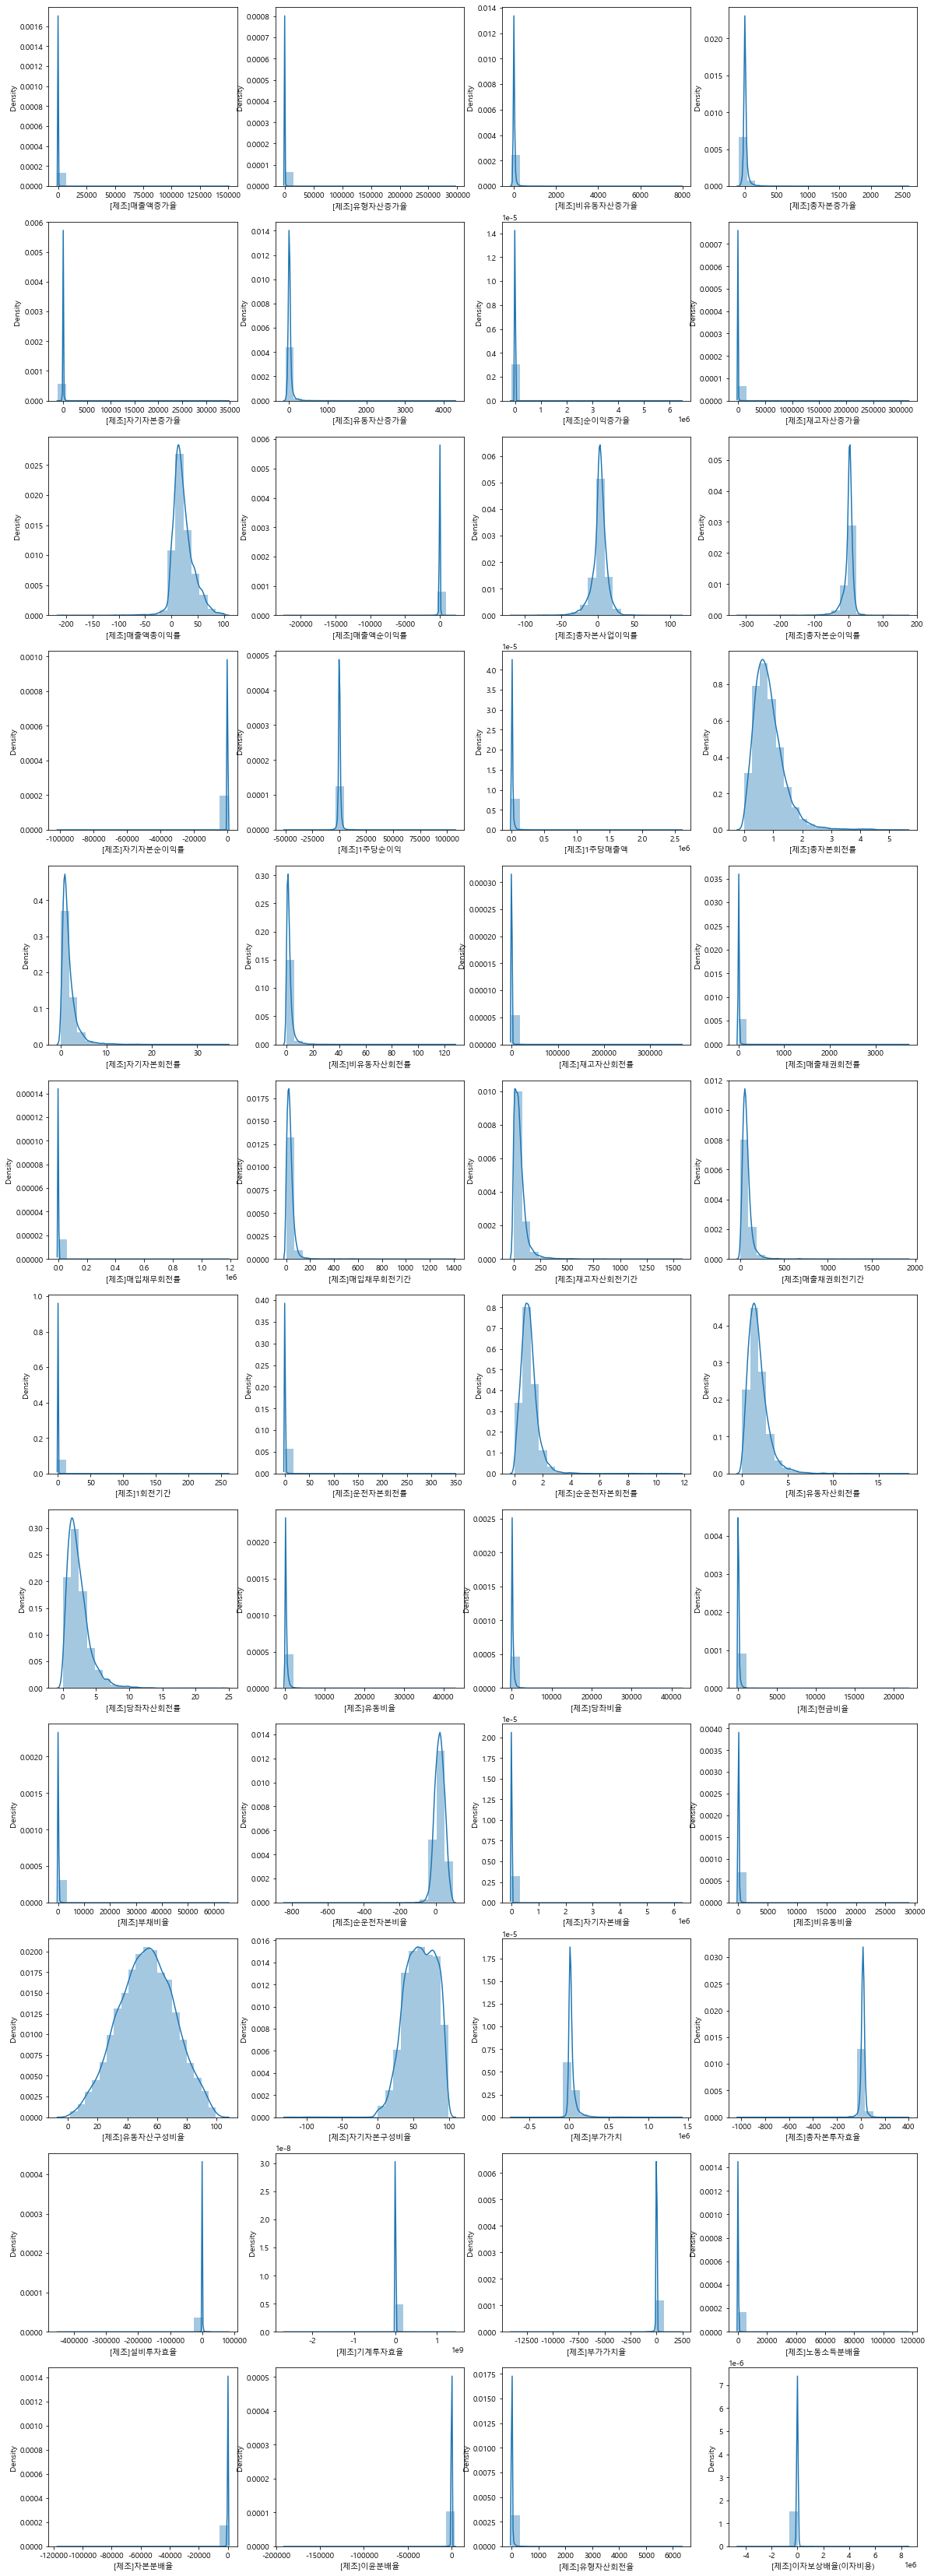

In [4]:
col_n = 4
row_n = 12

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(df_n.columns):
    sns.distplot(df_n[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

### 각 피처마다 줘야할 윈저값이 다르므로 서로 다르게 윈저값을 줌

In [5]:
df['[제조]매출액증가율'] = winsorize(df['[제조]매출액증가율'], limits= (0, 0.1))
df['[제조]유형자산증가율'] = winsorize(df['[제조]유형자산증가율'], limits= (0, 0.1))
df['[제조]비유동자산증가율'] = winsorize(df['[제조]비유동자산증가율'], limits= (0, 0.1))
df['[제조]총자본증가율'] = winsorize(df['[제조]총자본증가율'], limits= (0, 0.1))
df['[제조]자기자본증가율'] = winsorize(df['[제조]자기자본증가율'], limits= (0, 0.1))
df['[제조]유동자산증가율'] = winsorize(df['[제조]유동자산증가율'], limits= (0, 0.1))
df['[제조]순이익증가율'] = winsorize(df['[제조]순이익증가율'], limits= (0.05, 0.05))
df['[제조]재고자산증가율'] = winsorize(df['[제조]재고자산증가율'], limits= (0, 0.1))
df['[제조]매출액총이익률'] = winsorize(df['[제조]매출액총이익률'], limits= (0.05, 0.05))
df['[제조]매출액순이익률'] = winsorize(df['[제조]매출액순이익률'], limits= (0.05, 0.05))
df['[제조]총자본사업이익률'] = winsorize(df['[제조]총자본사업이익률'], limits= (0.05, 0.05))
df['[제조]총자본순이익률'] = winsorize(df['[제조]총자본순이익률'], limits= (0.05, 0.05))
df['[제조]자기자본순이익률'] = winsorize(df['[제조]자기자본순이익률'], limits= (0.1, 0))
df['[제조]1주당순이익'] = winsorize(df['[제조]1주당순이익'], limits= (0.05, 0.05))
df['[제조]1주당매출액'] = winsorize(df['[제조]1주당매출액'], limits= (0, 0.1))
df['[제조]총자본회전률'] = winsorize(df['[제조]총자본회전률'], limits= (0, 0.1))
df['[제조]자기자본회전률'] = winsorize(df['[제조]자기자본회전률'], limits= (0, 0.1))
df['[제조]비유동자산회전률'] = winsorize(df['[제조]비유동자산회전률'], limits= (0, 0.1))
df['[제조]재고자산회전률'] = winsorize(df['[제조]재고자산회전률'], limits= (0, 0.1))
df['[제조]매출채권회전률'] = winsorize(df['[제조]매출채권회전률'], limits= (0, 0.1))
df['[제조]매입채무회전률'] = winsorize(df['[제조]매입채무회전률'], limits= (0, 0.1))
df['[제조]매입채무회전기간'] = winsorize(df['[제조]매입채무회전기간'], limits= (0, 0.1))
df['[제조]재고자산회전기간'] = winsorize(df['[제조]재고자산회전기간'], limits= (0, 0.1))
df['[제조]매출채권회전기간'] = winsorize(df['[제조]매출채권회전기간'], limits= (0, 0.1))
df['[제조]1회전기간'] = winsorize(df['[제조]1회전기간'], limits= (0, 0.1))
df['[제조]운전자본회전률'] = winsorize(df['[제조]운전자본회전률'], limits= (0, 0.1))
df['[제조]순운전자본회전률'] = winsorize(df['[제조]순운전자본회전률'], limits= (0, 0.1))
df['[제조]유동자산회전률'] = winsorize(df['[제조]유동자산회전률'], limits= (0, 0.1))
df['[제조]당좌자산회전률'] = winsorize(df['[제조]당좌자산회전률'], limits= (0, 0.1))
df['[제조]유동비율'] = winsorize(df['[제조]유동비율'], limits= (0, 0.1))
df['[제조]당좌비율'] = winsorize(df['[제조]당좌비율'], limits= (0, 0.1))
df['[제조]현금비율'] = winsorize(df['[제조]현금비율'], limits= (0, 0.1))
df['[제조]부채비율'] = winsorize(df['[제조]부채비율'], limits= (0, 0.1))
df['[제조]순운전자본비율'] = winsorize(df['[제조]순운전자본비율'], limits= (0.1, 0))
df['[제조]자기자본배율'] = winsorize(df['[제조]자기자본배율'], limits= (0, 0.1))
df['[제조]비유동비율'] = winsorize(df['[제조]비유동비율'], limits= (0, 0.1))
df['[제조]유동자산구성비율'] = winsorize(df['[제조]유동자산구성비율'], limits= (0.05, 0.05))
df['[제조]자기자본구성비율'] = winsorize(df['[제조]자기자본구성비율'], limits= (0.1, 0))
df['[제조]부가가치'] = winsorize(df['[제조]부가가치'], limits= (0.05, 0.05))
df['[제조]총자본투자효율'] = winsorize(df['[제조]총자본투자효율'], limits= (0.1, 0))
df['[제조]설비투자효율'] = winsorize(df['[제조]설비투자효율'], limits= (0.05, 0.05))
df['[제조]기계투자효율'] = winsorize(df['[제조]기계투자효율'], limits= (0.05, 0.05))
df['[제조]부가가치율'] = winsorize(df['[제조]부가가치율'], limits= (0.05, 0.05))
df['[제조]노동소득분배율'] = winsorize(df['[제조]노동소득분배율'], limits= (0, 0.1))
df['[제조]자본분배율'] = winsorize(df['[제조]자본분배율'], limits= (0.1, 0))
df['[제조]이윤분배율'] = winsorize(df['[제조]이윤분배율'], limits= (0.1, 0))
df['[제조]유형자산회전율'] = winsorize(df['[제조]유형자산회전율'], limits= (0, 0.1))
df['[제조]이자보상배율(이자비용)'] = winsorize(df['[제조]이자보상배율(이자비용)'], limits= (0.05, 0.05))

## Winsorize 사용 후 Histogram 확인

In [6]:
df_w = df[['[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)']]

### 정규성 재확인

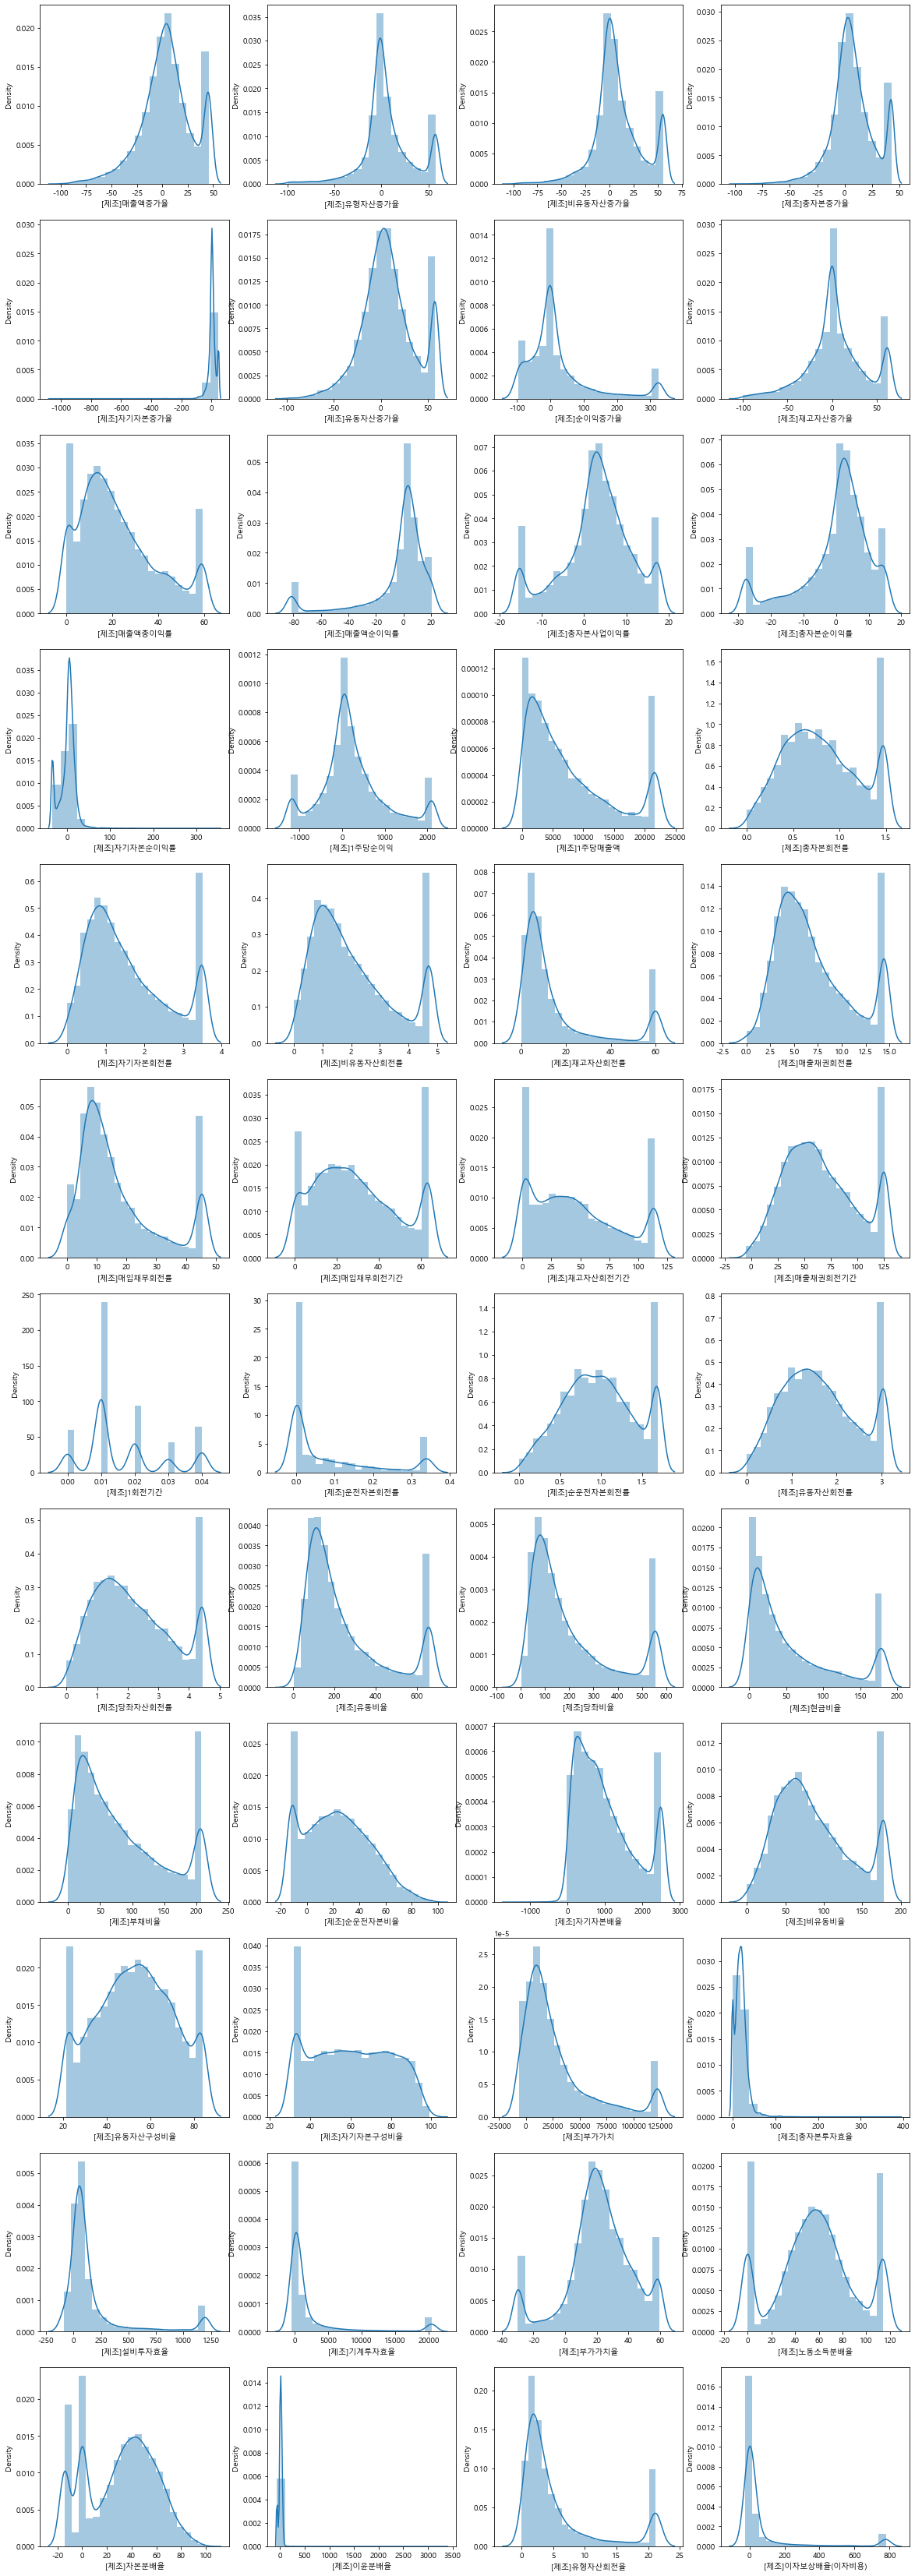

In [7]:
col_n = 4
row_n = 12

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))


for i,col in enumerate(df_w.columns):
    sns.distplot(df_w[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])